In [119]:
import csv
import time
import numpy as np
import pandas as pd
import datetime as dt
from datetime import date
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt

In [120]:
df = pd.read_csv("weekly_data_for_visualization.csv")
ids = df["Q317"].unique()
ids=ids[:-2] #only keeping the numbers of ids
ids

array(['117639', '144932', '158455', '186277', '294592', '312317',
       '313449', '325268', '351278', '441255', '446875', '453897',
       '481113', '483491', '483975', '494149', '495579', '547832',
       '575389', '738648', '752457', '773684', '855371', '865112',
       '873115', '918349', '931499', '953571'], dtype=object)

In [121]:
# create a list of dates from mili sec
def changeDateType(dates):
    date_final = [i.split(" ")[0] for i in dates]
    converted_dates = []
    for i in range(0,len(date_final)):  
        date_object = datetime.strptime(date_final[i], '%m/%d/%Y')
        converted_dates.append(date_object)
    return converted_dates

In [122]:
def changeYYMMDD(date):
    index = date.index("-")
    date = date[index-4:index+6]
    date = date.replace("-","/")
    date_object = datetime.strptime(date, '%Y/%m/%d')

    return date_object


In [123]:
def addBaseLine(idf,surveyKeep):
    df = pd.read_csv("sassema baseline 3.16.2023.csv")

    if idf == "773684":
        idf = "773"
    
    baselineDate = str(df.loc[df["ID"]==idf, 'StartDate'])

    date_object = changeYYMMDD(baselineDate)

    surveyKeep.insert(0,date_object)



In [124]:
def removeIndex(item):
    item = item.split(" ")[0]
    return item 

In [134]:
dayDict={}
sensingData = pd.read_csv("Activity_clean1.csv")
for id in ids:
    # dates
    print("id---------", id)
    surveydates = df.loc[df["Q317"]==id, 'StartDate'] 
    # add the survey dates of a user id to a list
    surveyKeep = changeDateType(surveydates)

    addBaseLine(id,surveyKeep)
    
    # create a list of surveys that we keep for each user 
    
    i = 1
    # discard current survey if the time interval between previous and current survey is not 7 
    while i < len(surveyKeep):

        numDays = surveyKeep[i] - surveyKeep[i-1]
        strDays = str(numDays)

        difference = strDays.split(" ")[0]
        difference = int(difference)

        if difference < 7:
            surveyKeep.pop(i) 

        else: 
            i = i + 1 


    #create a list of sensing data

    sensingDates = sensingData.loc[(sensingData["Userid"])==int(id), ' senseStartTime'] #Userid in activity file is int (different from weekly survey)

    # print("sensingDates ==", sensingDates)
    sensingKeep = []

    if len(sensingDates) != 0:
        # print("lentgth of cur sensing dates |||", len(sensingDates))
        for d in sensingDates:
            date_object = changeYYMMDD(d)
            if date_object not in sensingKeep:
                sensingKeep.append(date_object)
        # print("sensingKeep LOOKHERE ===", sensingKeep)

    
    #for each id participant
    #for each survey dates, find the sensing dates in between survey date and 7 days prior 
    for i in range(1,len(surveyKeep)):
        if (len(sensingKeep) != 0):
            count = 0
            # print("survey date checkkk----", surveyKeep[i])
            for j in range(0,len(sensingKeep)):
                # print("sensing date checkkk", sensingKeep[j])

                if surveyKeep[i] == sensingKeep[j]:
                    numDiff = 0
                else: 
                    numDiff = surveyKeep[i] - sensingKeep[j]
                    numDiff = str(numDiff)
                    numDiff = numDiff.split(" ")[0]
                    numDiff = int(numDiff)
                if (numDiff < 7) and (numDiff >= 0):
                    # print("CHECK WHEN 88888888888888 =======", numDiff)
                    count += 1
            # print("check if count resettttttttttttt", count)
            if count not in dayDict:
                dayDict[count] = 1
            else:
                dayDict[count] += 1

print(dayDict)


        




id--------- 117639
id--------- 144932
id--------- 158455
id--------- 186277
id--------- 294592
id--------- 312317
id--------- 313449
survey date checkkk---- 2022-04-17 00:00:00
sensing date checkkk 2022-04-10 00:00:00
sensing date checkkk 2022-04-11 00:00:00
CHECK WHEN 88888888888888 ======= 6
sensing date checkkk 2022-04-12 00:00:00
CHECK WHEN 88888888888888 ======= 5
sensing date checkkk 2022-04-13 00:00:00
CHECK WHEN 88888888888888 ======= 4
sensing date checkkk 2022-04-15 00:00:00
CHECK WHEN 88888888888888 ======= 2
sensing date checkkk 2022-04-16 00:00:00
CHECK WHEN 88888888888888 ======= 1
sensing date checkkk 2022-04-17 00:00:00
CHECK WHEN 88888888888888 ======= 0
sensing date checkkk 2022-04-19 00:00:00
sensing date checkkk 2022-04-20 00:00:00
sensing date checkkk 2022-04-21 00:00:00
sensing date checkkk 2022-04-22 00:00:00
sensing date checkkk 2022-04-23 00:00:00
sensing date checkkk 2022-04-24 00:00:00
sensing date checkkk 2022-04-25 00:00:00
sensing date checkkk 2022-04-26 0

{0: 3, 3: 2, 4: 5, 5: 4, 6: 6, 7: 19}


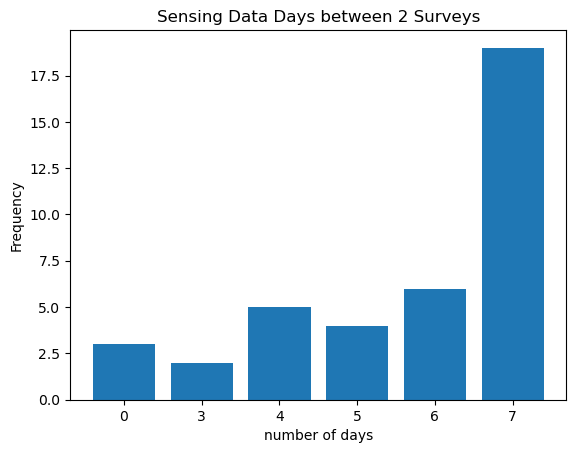

In [137]:
#sort for the plot
myKeys = list(dayDict.keys())
myKeys.sort()
dayDict = {i: dayDict[i] for i in myKeys}
print(dayDict)


#plot the histogram

interval_int = list(dayDict.keys())
interval = []
for i in interval_int:
    interval.append(str(i))
num = list(dayDict.values())

plt.bar(interval, num)
plt.title("Sensing Data Days between 2 Surveys")
plt.xlabel("number of days")
plt.ylabel("Frequency")
plt.show()